# 특성공학(Feature Engineering)

## 다중회귀분석
- 다항회귀는 변수에 대해 다항식을 만들어 분석 (y = ax^2 + bx + c)
- 다중회귀는 변수 여러 개의 관계를 사용해 분석하는 것 (y = ax1 + bx2 + cx1^2 + dx2^2 + ex1x2)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

# X
df = pd.read_csv('./perch.csv')
perch_data = df.to_numpy()

# y
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

# TTsplit
X_train, X_test, y_train, y_test = train_test_split(perch_data, perch_weight, random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
print('훈련:',lr.score(X_train, y_train))
print('테스트:',lr.score(X_test, y_test))

훈련: 0.9559326821885706
테스트: 0.8796419177546366


In [18]:
from sklearn.preprocessing import PolynomialFeatures

# polynomialfeatures - 원본, 제곱, 서로 곱한 값을 알아서 계산해주는 모듈
poly = PolynomialFeatures(include_bias=False)
# sklearn에서 fit 해야만 transform이 되게 설정해서....
poly.fit([[2, 3, 5]])
poly.transform([[2, 3, 5]])

array([[ 2.,  3.,  5.,  4.,  6., 10.,  9., 15., 25.]])

In [28]:
poly = PolynomialFeatures(include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

lr_p = LinearRegression()
lr_p.fit(X_train_poly, y_train)
print('훈련:',lr_p.score(X_train_poly, y_train))
print('테스트:',lr_p.score(X_test_poly, y_test))

훈련: 0.9903183436982124
테스트: 0.9714559911594145


In [ ]:
# 과대적합, overfitting
poly_over = PolynomialFeatures(degree=5, include_bias=False)
X_train_poly_over = poly_over.fit_transform(X_train)
X_test_poly_over = poly_over.fit_transform(X_test)

lr_p5 = LinearRegression()
lr_p5.fit(X_train_poly_over, y_train)
print('훈련:',lr_p5.score(X_train_poly_over, y_train))  # 거의 1에 가깝다, 거의 완벽하게 맞춤 -> 초과대적합
print('테스트:',lr_p5.score(X_test_poly_over, y_test))  # -144 -> 틀린 정도가 좀 심함

훈련: 0.9999999999996176
테스트: -144.40585108215134


## 규제(Regularization)

과대적합 방지용

- 릿지(ridge) 회귀: 계수를 제곱한 값을 기준으로 규제 - 제곱합에 벌점을 추가함, 계수 크기를 0에 가깝게 줄임
- 라쏘(lasso) 회귀: 절대값 기준으로 규제 - 몇몇 계수를 0으로 바꿔버림

In [43]:
# 특성을 많이 넣을수록 과대적합할 가능성이 크다.

# 스케일링
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train_poly_over)  # fit_transform이 있지만, 훈련 셋 기준으로 스케일링 해야 하기 때문에 따로
X_train_scaled = ss.transform(X_train_poly_over)
X_test_scaled = ss.transform(X_test_poly_over)

In [ ]:
# 릿지 회귀
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)  # hyperparameter: alpha, 기본값 1
ridge.fit(X_train_scaled, y_train)
print('훈련:',ridge.score(X_train_scaled, y_train))
print('테스트:',ridge.score(X_test_scaled, y_test))  # 특성 55개를 다 썼는데 정상화됨

훈련: 0.9903815817570368
테스트: 0.9827976465386983


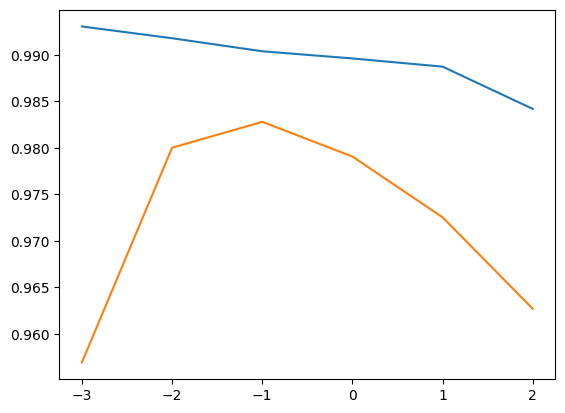

In [ ]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    train_score.append(ridge.score(X_train_scaled, y_train))
    test_score.append(ridge.score(X_test_scaled, y_test))
    
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()
# alpha의 최적값은 아마 0.1(둘 다 크고, 차이가 적음)

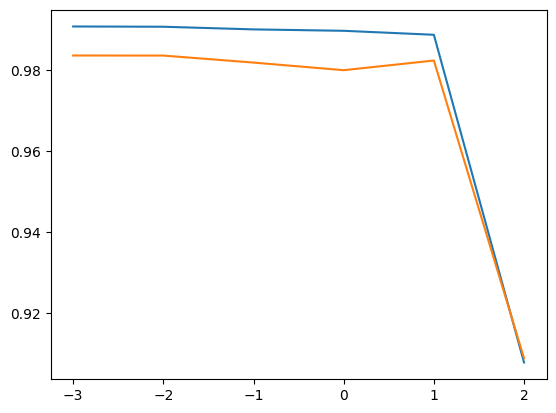

In [72]:
# 라쏘 회귀
from sklearn.linear_model import Lasso

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    train_score.append(lasso.score(X_train_scaled, y_train))
    test_score.append(lasso.score(X_test_scaled, y_test))
    
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [76]:
lasso = Lasso(alpha=10)
lasso.fit(X_train_scaled, y_train)
print('훈련:',lasso.score(X_train_scaled, y_train))
print('테스트:',lasso.score(X_test_scaled, y_test))

훈련: 0.9888067471131867
테스트: 0.9824470598706695


In [78]:
X = ss.transform(poly_over.transform([[13.7, 3.53, 2]]))
lasso.predict(X)

array([29.95618891])